# 1. La revolución de Statcast

Aaron Judge es uno de los jugadores físicamente más grandes de las Grandes Ligas de Béisbol, con una altura de 6 pies y 7 pulgadas (2,01 m) y un peso de 282 libras (128 kg). También conectó el [jonrón más duro](https://www.mlb.com/news/aaron-judge-sets-statcast-exit-velocity-record/c-235640846) jamás registrado. Cómo sabemos esto? **Estadística**.

Statcast es un sistema de seguimiento de última generación que utiliza cámaras de alta resolución y equipos de radar para medir la ubicación y el movimiento precisos de pelotas y jugadores de béisbol. Introducidos en 2015 en los 30 estadios de béisbol de las Grandes Ligas, los datos de Statcast están revolucionando el juego. Los equipos están participando en una "carrera armamentista" de análisis de datos, contratando analistas a diestro y siniestro en un intento por obtener una ventaja sobre la competencia. Este [video](https://www.youtube.com/watch?v=9rOKGKhQe8U) que describe el sistema es increíble.

**En este cuaderno**, discutiremos, analizaremos y visualizaremos datos de Statcast para comparar al Sr. Judge con otro (extremadamente grande) compañero de equipo suyo. Comencemos cargando los datos en nuestro Notebook. Hay dos archivos CSV, `judge.csv` y `stanton.csv`, los cuales contienen datos de Statcast para 2015-2017. Usaremos pandas DataFrames para almacenar estos datos. Carguemos también nuestras bibliotecas de visualización de datos, matplotlib y seaborn.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Cargar datos de Aaron Judge's 
judge = pd.read_csv('datasets/judge.csv')

# Cargar datos de Giancarlo Stanton's 
stanton = pd.read_csv('datasets/stanton.csv')



# 2. ¿Qué puede medir Statcast?

La mejor pregunta podría ser, ¿qué no puede medir Statcast?

> Comenzando con el lanzador, Statcast puede medir puntos de datos simples como la velocidad. Al mismo tiempo, Statcast profundiza mucho más y también mide el punto de lanzamiento y la velocidad de giro de cada lanzamiento.
>
> Pasando a los bateadores, Statcast es capaz de medir la velocidad de salida, el ángulo de lanzamiento y el vector de la pelota cuando sale del bate. A partir de ahí, Statcast también puede rastrear el tiempo de suspensión y la distancia proyectada que recorre una pelota.

Inspeccionemos las últimas cinco filas del marco de datos `judge`. Verás que cada fila representa un lanzamiento lanzado a un bateador. También verá que algunas columnas tienen nombres esotéricos. Si esto no tiene sentido ahora, no se preocupe. Los pertinentes se explicarán según sea necesario.



In [14]:
# mostrar todas las columnas
pd.set_option('display.max_columns', None)
# uso el método tail para mostrar las ultimas 5 filas de df judge
judge.tail()


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
3431,CH,2016-08-13,85.6,-1.9659,5.9113,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,0,2016,-0.379108,0.370567,0.739,1.442,NaN,NaN,NaN,0,5,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_144259,6.960,-124.371,-4.756,-2.821,23.634,-30.220,3.93,1.82,NaN,NaN,NaN,84.459,1552.0,5.683,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8144,0.00,0.000,NaN,NaN,NaN,NaN,NaN,36,1
3432,CH,2016-08-13,87.6,-1.9318,5.9349,Aaron Judge,592450,542882,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Aaron Judge homers (1) on a fly ball to center...,R,R,R,NYY,TB,X,NaN,fly_ball,1,2,2016,-0.295608,0.320400,-0.419,3.273,NaN,NaN,NaN,2,2,Bot,130.45,14.58,NaN,NaN,571912.0,NaN,160813_135833,4.287,-127.452,-0.882,-1.972,24.694,-30.705,4.01,1.82,446.0,108.8,27.410,86.412,1947.0,5.691,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8064,0.98,1.937,2.0,1.0,0.0,3.0,6.0,14,4
3433,CH,2016-08-13,87.2,-2.0285,5.8656,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,2,2016,-0.668575,0.198567,0.561,0.960,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135815,7.491,-126.665,-5.862,-6.393,21.952,-32.121,4.01,1.82,NaN,NaN,NaN,86.368,1761.0,5.721,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.7770,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,3
3434,CU,2016-08-13,79.7,-1.7108,6.1926,Aaron Judge,592450,542882,NaN,foul,NaN,NaN,NaN,NaN,4.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,1,2016,0.397442,-0.614133,-0.803,2.742,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135752,1.254,-116.062,0.439,5.184,21.328,-39.866,4.01,1.82,9.0,55.8,-24.973,77.723,2640.0,5.022,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,55.4756,0.00,0.000,NaN,NaN,NaN,NaN,1.0,14,2
3435,FF,2016-08-13,93.2,-1.8476,6.0063,Aaron Judge,592450,542882,NaN,called_strike,NaN,NaN,NaN,NaN,8.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,0,2016,-0.823050,1.623300,-0.273,2.471,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135736,5.994,-135.497,-6.736,-9.360,26.782,-13.446,4.01,1.82,NaN,NaN,NaN,92.696,2271.0,6.068,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.4299,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,1


# 3. Aaron Judge y Giancarlo Stanton.

Giancarlo Stanton también es un ser humano muy grande, mide 6 pies y 6 pulgadas de alto y pesa 245 libras. A pesar de no llevar la misma camiseta que Judge en las imágenes proporcionadas, en 2018 serán compañeros de equipo en los New York Yankees. Son similares en muchos aspectos, uno de ellos es que conectan muchos jonrones. Stanton y Judge lideraron el béisbol en jonrones en 2017, con [59](https://www.youtube.com/watch?v=tJ6Bz5P6dg4) y [52](https://www.youtube.com/watch?v =Gw3pFHMM9fk), respectivamente. Estos son totales excepcionales: el jugador en tercera "solo" tuvo 45 jonrones.

Stanton y Judge también son diferentes en muchos aspectos. Uno es [eventos de pelota bateada] (http://m.mlb.com/glossary/statcast/batted-ball-event), que es cualquier pelota bateada que produce un resultado. Esto incluye outs, hits y errores. A continuación, encontrará los recuentos de eventos de pelota bateada para cada jugador en 2017. Las frecuencias de otros eventos son bastante diferentes.

In [15]:
# Filtrar las pelotas bateadas de cada jugador en la temporada 2017.

# filtro "judge" para incluir lanzamientos del 2017 y selecciono la columna "events"
judge_events_2017 = judge.loc[judge['game_year'] == 2017].events

#uso el método "value_counts"; para contar valores unicos en "judge_events_2017"
print("Total de pelotas bateadas por Aaron Judge en el 2017:")
print(judge_events_2017.value_counts())

#hago lo mismo para stanton

stanton_events_2017 = stanton.loc[stanton['game_year'] == 2017].events
print("Total de pelotas bateadas por Giancarlo Stanton , 2017:")
print(stanton_events_2017.value_counts())




Total de pelotas bateadas por Aaron Judge en el 2017:
strikeout                    207
field_out                    146
walk                         116
single                        75
home_run                      52
double                        24
grounded_into_double_play     15
force_out                     11
intent_walk                   11
hit_by_pitch                   5
sac_fly                        4
fielders_choice_out            4
field_error                    4
triple                         3
strikeout_double_play          1
Name: events, dtype: int64
Total de pelotas bateadas por Giancarlo Stanton , 2017:
field_out                    239
strikeout                    161
single                        77
walk                          72
home_run                      59
double                        32
intent_walk                   13
grounded_into_double_play     13
force_out                      7
hit_by_pitch                   7
field_error                    5
sac_f

# 4. Análisis de home runs con datos de Statcast

Así que Judge otorga bases por bolas y poncha más que Stanton. Stanton sale volando más que Judge. Pero entremos en sus perfiles de bateo con más detalle. Dos de las métricas de Statcast más innovadoras son el ángulo de lanzamiento y la velocidad de salida:

- [Ángulo de lanzamiento](http://m.mlb.com/glossary/statcast/launch-angle): el ángulo vertical en el que la pelota sale del bate de un jugador
- [Velocidad de salida](http://m.mlb.com/glossary/statcast/exit-velocity): la velocidad de la pelota de béisbol cuando sale del bate

Estos nuevos datos han cambiado la forma en que los equipos valoran tanto a los bateadores como a los lanzadores. ¿Por qué? Según el [Washington Post](https://www.washingtonpost.com/graphics/sports/mlb-launch-angles-story/?utm_term=.8d088d31f098):

> Es más probable que las pelotas golpeadas con un ángulo de lanzamiento alto resulten en un hit. Golpea lo suficientemente rápido y en el ángulo correcto, se convierten en jonrones.

Veamos la velocidad de salida frente al ángulo de lanzamiento y centrémonos solo en los jonrones (2015-2017). Las dos primeras gráficas muestran puntos de datos. Los dos segundos muestran contornos suavizados para representar la densidad.

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecate

Text(0.5, 1.0, 'Giancarlo Stanton\nHome Runs, 2015-2017')

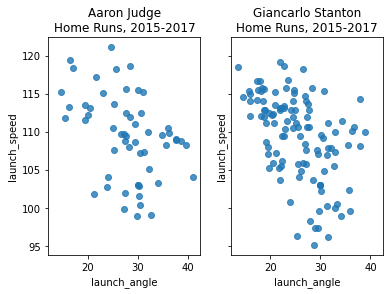

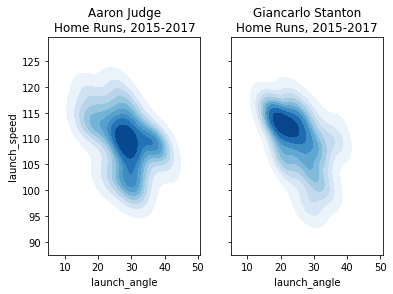

In [16]:
#NOTA: seaborn.regplot(): Este método se utiliza para graficar datos y un ajuste de modelo de regresión lineal.

# Filtrar los home runs de cada jugador. Luego grafico la velocidad de salida frente al ángulo de lanzamiento

#filtro los df de jugge y stanton
judge_hr = judge.loc[judge['events'] == 'home_run']
stanton_hr = stanton.loc[stanton['events'] == 'home_run']

# Crear con seaborn dos diagramas de dispersión de la velocidad de lanzamiento frente al ángulo de lanzamiento, para cada jugador

fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x='launch_angle', y='launch_speed', fit_reg=False, color='tab:blue', data=judge_hr, ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.regplot(x='launch_angle', y='launch_speed', fit_reg=False, color='tab:blue', data=stanton_hr, ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')

# crear con seaborn dos diagramas de KDE de velocidad de lanzamiento frente a ángulo de lanzamiento,
fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_hr.launch_angle, judge_hr.launch_speed, cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.kdeplot(stanton_hr.launch_angle, stanton_hr.launch_speed, cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')

# Cuadrangulares por velocidad de lanzamiento

Parece que Stanton conecta sus home run un poco más bajo y un poco más fuerte que Judge, aunque esto debe tomarse con pinzas dado el pequeño tamaño de la muestra de home runs.

Statcast no solo mide la velocidad de la pelota que sale del bate, también mide la velocidad de la pelota que sale de la mano del lanzador y comienza su viaje hacia el plato. Podemos usar estos datos para comparar los homeruns de Stanton y Judge en términos de velocidad de lanzamiento. A continuación, encontrará diagramas de caja que muestran los resúmenes de cinco números para cada jugador: mínimo, primer cuartil, mediana, tercer cuartil y máximo.

In [ ]:
# NOTAS: boxplot: Dibuja un diagrama de caja para mostrar las distribuciones con respecto a las categorías.


# Trace las velocidades de lanzamiento de los home run de cada jugador en diagramas de caja.
#Concatene judge_hry stanton_hruse la función pandas concat // pd.concat([df_1, df_2])
judge_stanton_hr = pd.concat([judge_hr, stanton_hr])


#Cree un diagrama de caja utilizando la función boxplot de Seaborn que describa la velocidad de lanzamiento de los home runs
#  de cada jugador.  Haga que el argumento de color sea 'tab:blue'.
sns.boxplot(x='player_name', y='release_speed', color='tab:blue', data=judge_stanton_hr).set_title('Home Runs, 2015-2017')



